<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>


#**Deep Learning: Image Classification with CNN.**

# ✿

### **Task and Dataset Info :**

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [214]:
#command to install tensorflow installs the TensorFlow library
!pip install tensorflow

# Import Libraries

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 10)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [216]:
import tensorflow as tf

# List all available physical devices (CPUs and GPUs)
physical_devices = tf.config.list_physical_devices()
print("Available physical devices:", physical_devices)

# List only GPU devices
gpu_devices = tf.config.list_physical_devices("GPU")
print("Available GPU devices:", gpu_devices)

# Check the number of GPUs available
num_gpus = len(gpu_devices)
print("Number of GPUs available:", num_gpus)


Available physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Available GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Number of GPUs available: 1


#**Loading dataset:**

In [217]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
#Dividing dataset to 4 parts:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


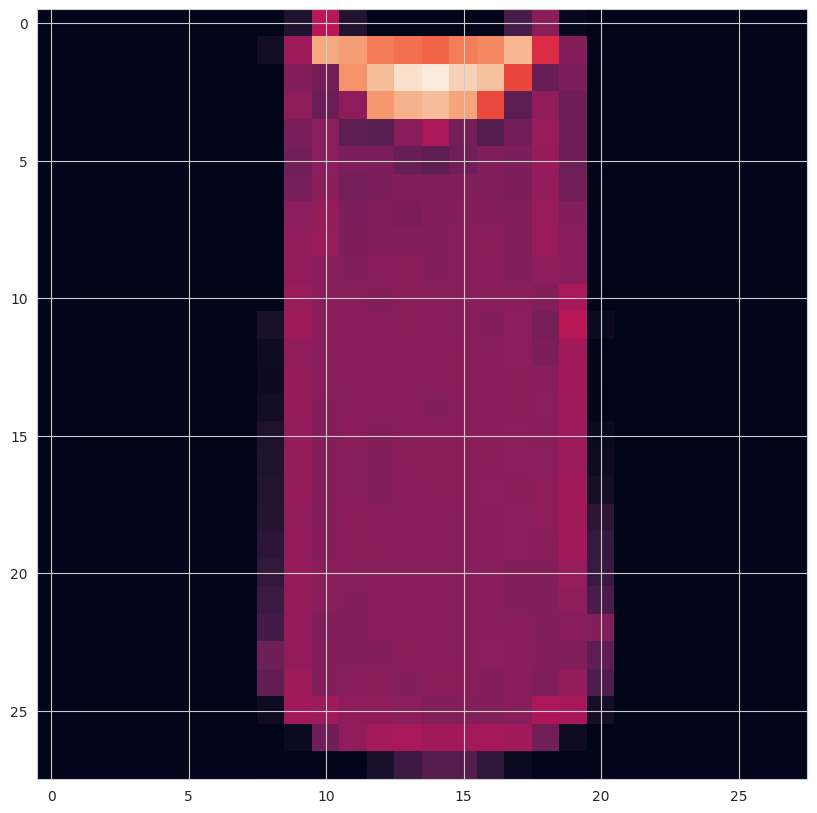

In [218]:
plt.imshow(X_train[2])

In [219]:
y_train[2]

0

In [220]:
print( X_train.shape)
print( y_train.shape)

(60000, 28, 28)
(60000,)


#**Visualization:**

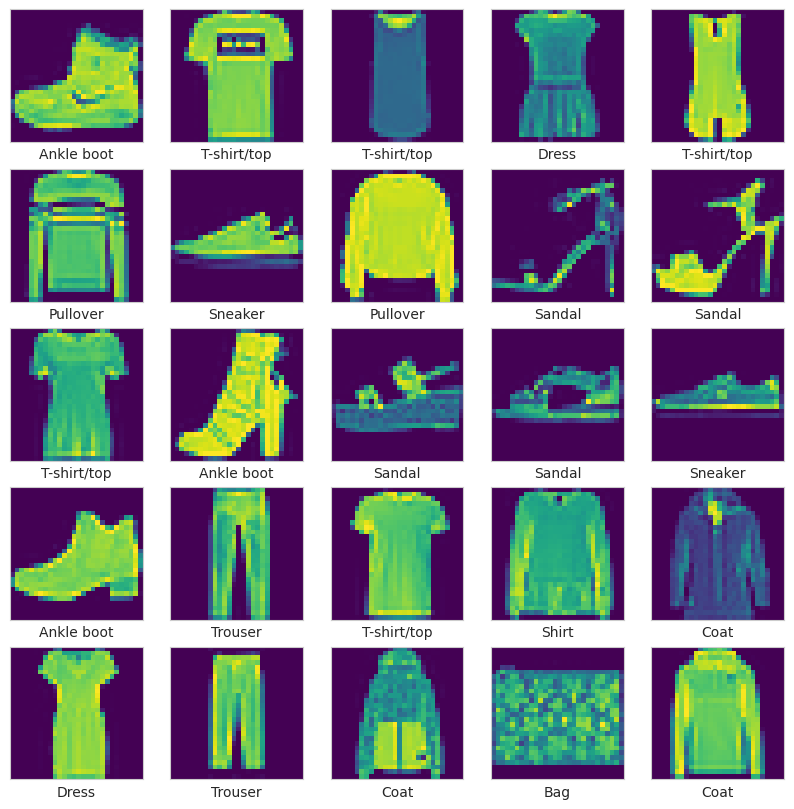

In [221]:
# Define class names for visualization
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Loop to display each image
for i in range(25):
    # Create subplots (5 rows, 5 columns), index i + 1
    plt.subplot(5, 5, i + 1)

    # Remove ticks and grid lines for a clean look
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image using e colormap
    plt.imshow(X_train[i], cmap='viridis')

    # Set the label for the image, using class_names and the corresponding label from the dataset
    plt.xlabel(class_names[y_train[i]])

# Show the grid of images
plt.show()

# **Data Preprocessing**

**To normalize the pixel values in the X train and X test data, you can divide each pixel value by the maximum value (255 in the case of 8-bit grayscale images). This will scale the pixel values to the range [0, 1].**

In [222]:
X_train[5].min()

0

In [223]:
X_train[5].max()

255

In [224]:
# Normalize the X train and X test data
X_train = X_train.astype("float")
X_test = X_test.astype("float")
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [225]:
print(X_train[5].min())
print(X_train[5].max())

0.0
255.0


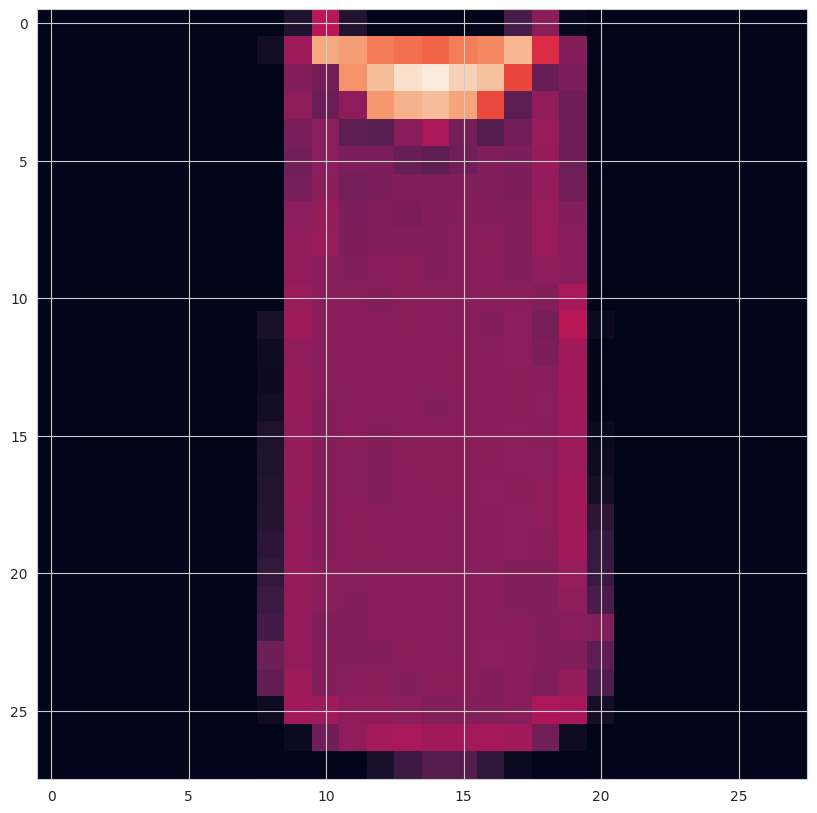

In [226]:
plt.imshow(X_train[2])
plt.show()

In [227]:
print(X_test.shape)
print(X_train.shape)

(10000, 28, 28)
(60000, 28, 28)


In [228]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [229]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [230]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modeling

In [231]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [232]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (1,1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [233]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 17500)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               2240128   
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [234]:
from tensorflow.keras.callbacks import EarlyStopping

In [235]:
early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="max",
                           patience=2,
                           restore_best_weights=True)

In [236]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 6.5308 - accuracy: 0.8342 - val_loss: 0.4326 - val_accuracy: 0.8505
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3099 - accuracy: 0.8931 - val_loss: 0.3499 - val_accuracy: 0.8862
Epoch 3/10
938/938 [==============================] - 8s 8ms/step - loss: 0.2585 - accuracy: 0.9100 - val_loss: 0.4551 - val_accuracy: 0.8729
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2288 - accuracy: 0.9193 - val_loss: 0.3968 - val_accuracy: 0.8890
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2057 - accuracy: 0.9298 - val_loss: 0.4891 - val_accuracy: 0.8819
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1907 - accuracy: 0.9367 - val_loss: 0.4953 - val_accuracy: 0.8761


In [237]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,6.531,0.834,0.433,0.850
1,0.310,0.893,0.350,0.886
2,0.258,0.910,0.455,0.873
3,0.229,0.919,0.397,0.889
4,0.206,0.930,0.489,0.882
5,0.191,0.937,0.495,0.876


<Axes: >

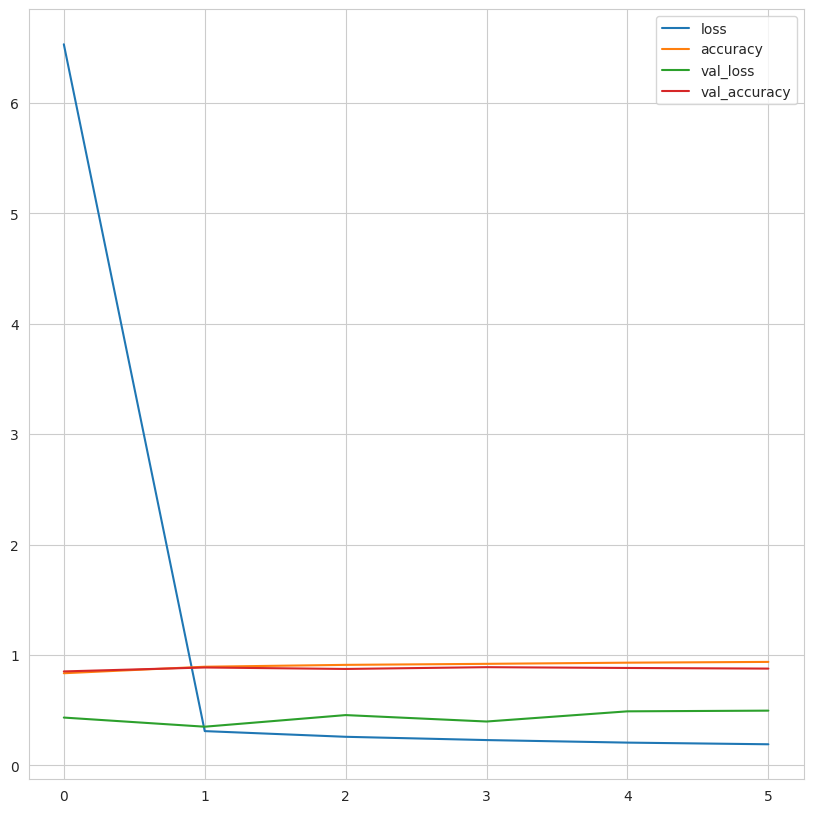

In [238]:
summary.plot()

<Axes: >

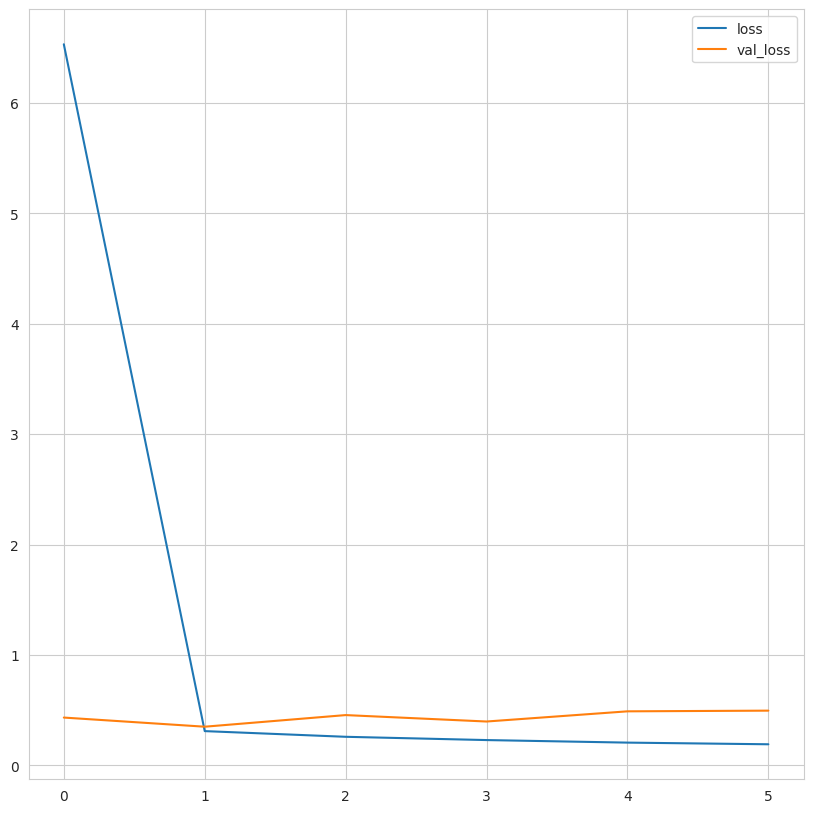

In [239]:
summary[["loss", "val_loss"]].plot()

<Axes: >

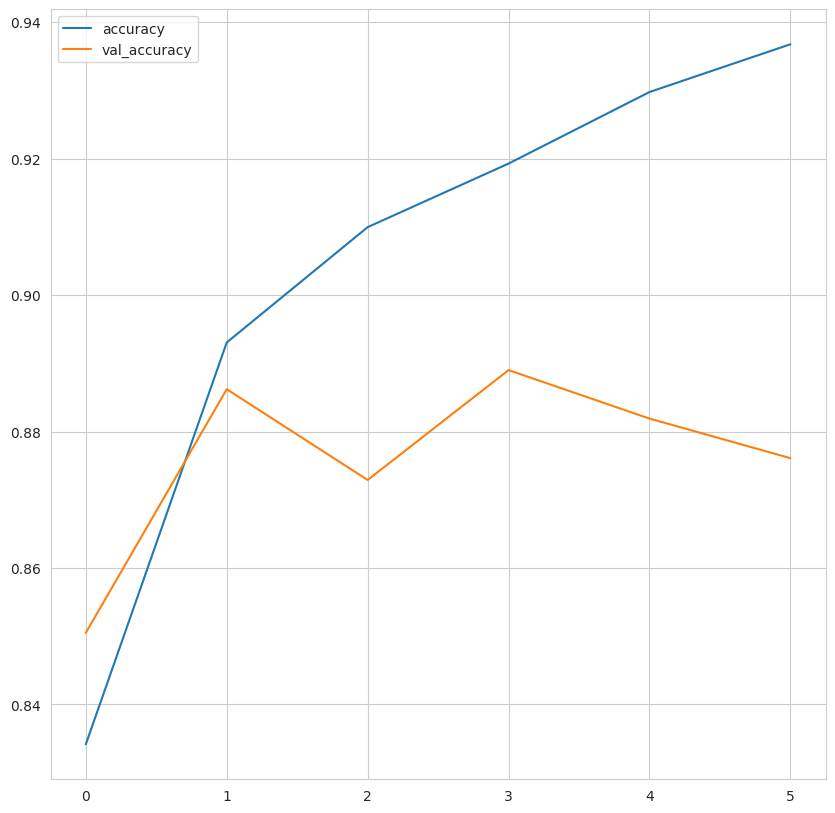

In [240]:
summary[["accuracy", "val_accuracy"]].plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [241]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [242]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3968 - accuracy: 0.8890


[0.39684605598449707, 0.8889999985694885]

In [243]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy", score[1])

Test loss:  0.39684605598449707
Test accuracy 0.8889999985694885


In [244]:
pred_prob = model.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)


313/313 [==============================] - 1s 2ms/step


In [245]:
pred_prob.shape

(10000, 10)

In [246]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [247]:
y_test_arg=np.argmax(y_test,axis=1)

In [248]:
Y_pred = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 2ms/step


<Axes: >

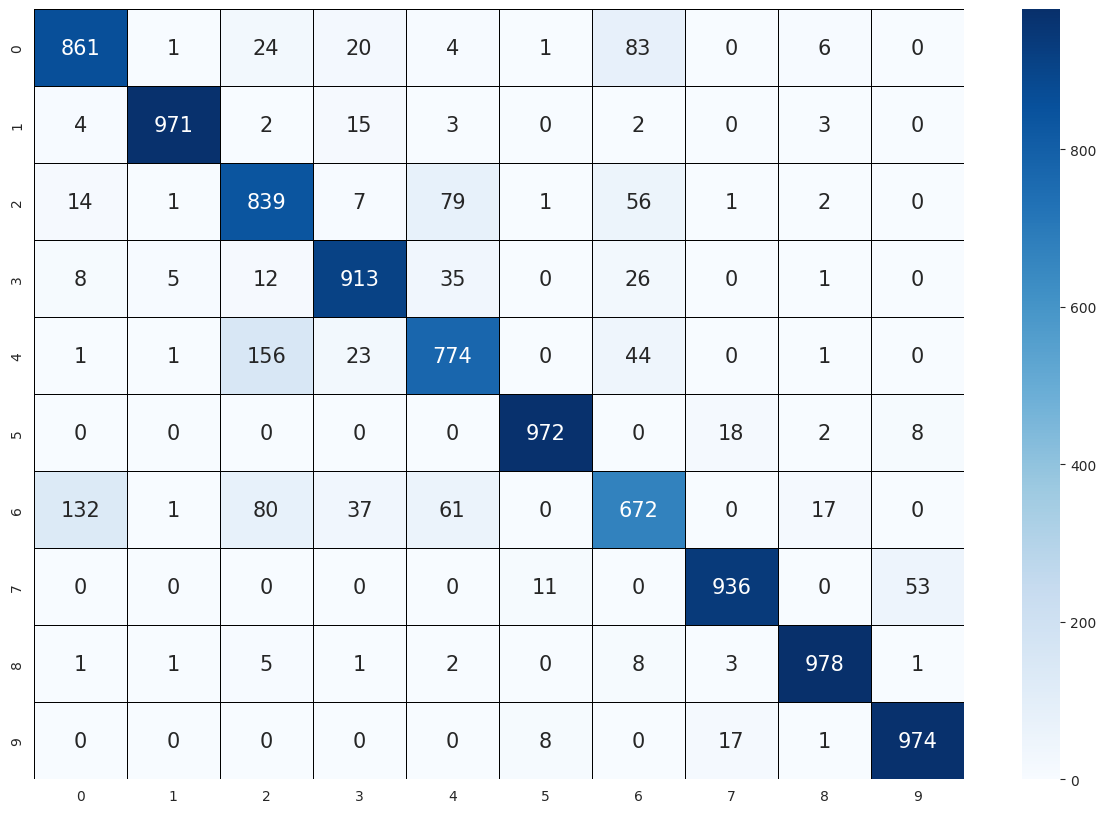

In [249]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test_arg, Y_pred),
            annot=True, cmap="Blues", linewidth=0.5, linecolor="black",
            fmt="g", annot_kws={"size" : 15})

In [250]:
(y_test_arg != Y_pred).sum()

1110

## Prediction

In [251]:
model.save("cnn-1.h5")

In [252]:
model = tf.keras.models.load_model("cnn-1.h5")

In [253]:
pred = model.predict(np.expand_dims(X_test[24], axis=0))
np.argmax(pred)

1/1 [==============================] - 0s 51ms/step


1

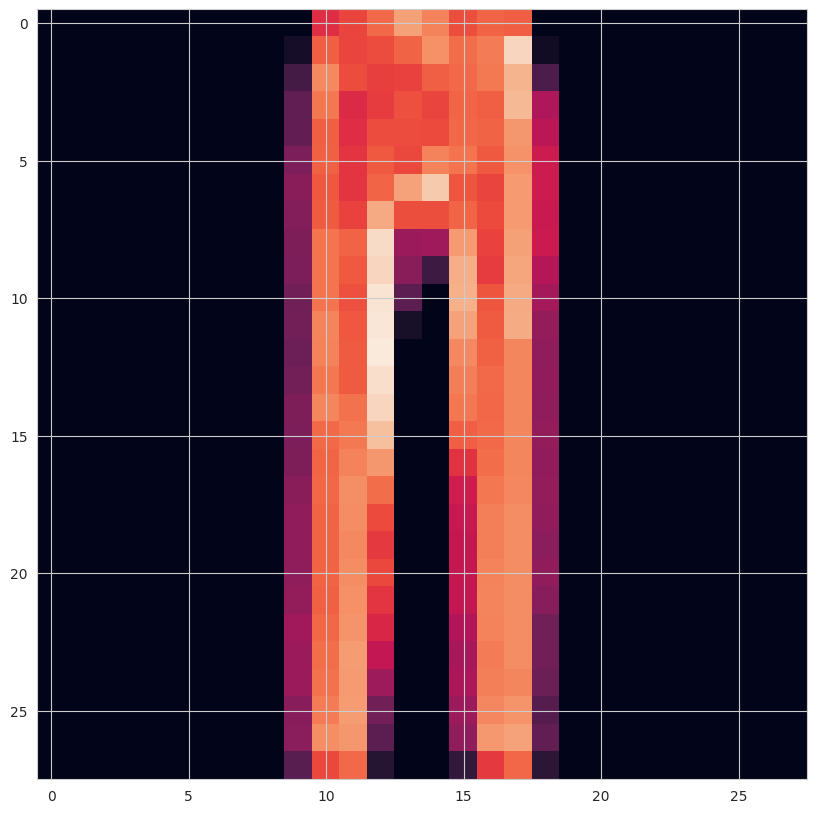

In [254]:
plt.imshow(X_test[24].reshape(28,28))